# Regression model
## Exploratory Phase

In [59]:
data <- read.csv(file.path("..", "data", "training_data.csv"))
data <- na.omit(data)
str(data)

'data.frame':	708 obs. of  4872 variables:
 $ Intensity             : Factor w/ 2 levels "high","low": 2 1 1 1 2 1 2 2 2 2 ...
 $ VALENCE.PLEASANTNESS  : int  45 49 56 7 51 21 56 52 53 1 ...
 $ SWEETORSOUR           : logi  FALSE TRUE TRUE FALSE FALSE FALSE ...
 $ complexity.from.pubmed: num  302 72.6 259 56.6 84.7 160 116 25 355 68.4 ...
 $ MW                    : num  208.3 122.2 242.3 88.1 136.2 ...
 $ AMW                   : num  5.95 6.43 7.57 6.29 6.19 ...
 $ Sv                    : num  19.7 11.35 20.83 7.54 12.88 ...
 $ Se                    : num  34.5 18.7 32.2 14.2 21.6 ...
 $ Sp                    : num  21.52 12.26 21.69 7.96 14.02 ...
 $ Si                    : num  39.6 21.3 35.5 16.1 24.7 ...
 $ Mv                    : num  0.563 0.597 0.651 0.538 0.585 0.588 0.667 0.49 0.609 0.619 ...
 $ Me                    : num  0.985 0.987 1.005 1.014 0.983 ...
 $ Mp                    : num  0.615 0.645 0.678 0.568 0.637 0.633 0.707 0.571 0.618 0.703 ...
 $ Mi                    

We can use 708 observation (n) of 4871 variables (p) (numerical annd categorical) to predict the pleasantness of the taste.

In [60]:
min(data$VALENCE.PLEASANTNESS)
max(data$VALENCE.PLEASANTNESS)

[1] 0

[1] 98

The pleasantness seem to correspond to a grade from 0 to 100.

We rename the response for simplicity.

In [61]:
data$PL <- data$VALENCE.PLEASANTNESS
data$VALENCE.PLEASANTNESS <- NULL

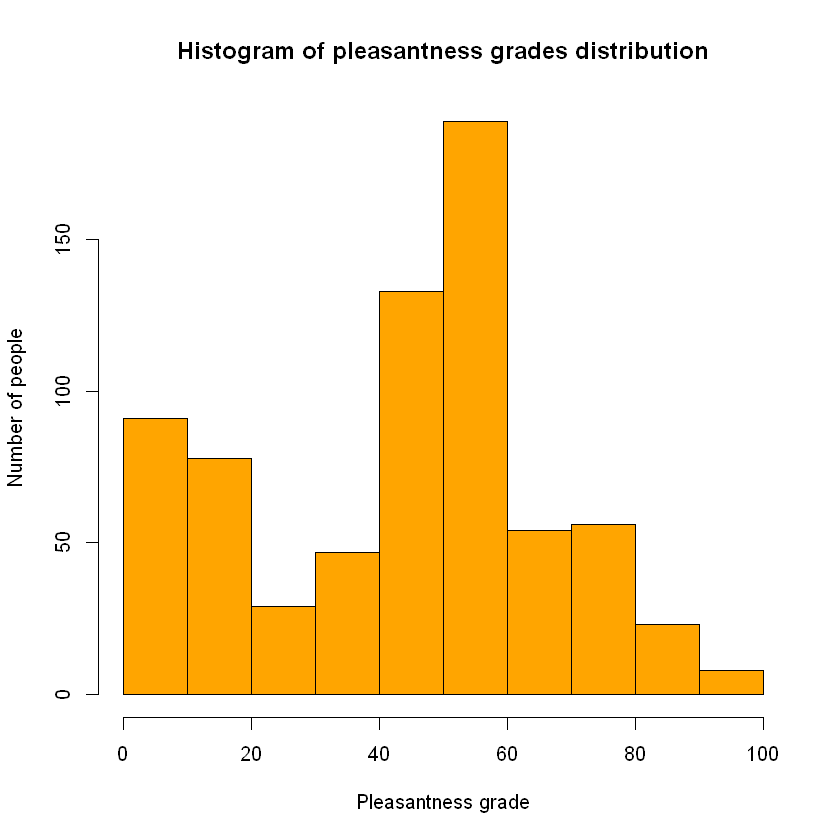

In [62]:
hist(data$PL, main = 'Histogram of pleasantness grades distribution',xlab = 'Pleasantness grade', ylab = 'Number of people', col = 'orange')

The response seem the respect gaussian distributionm with the exception of an important proportion of the population that systematically gives bad grades for some underlying reason. This might be linked to genetic markers.